<a href="https://colab.research.google.com/github/SABLISTER/prince/blob/main/preprocessing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # RNN, processes sequentially
from tensorflow.keras.layers import Dense # hidden layer
from sklearn.model_selection import train_test_split #80/20, 30/70, expressed as decimals
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
import pandas as pd
from sklearn.linear_model import LinearRegression # ML
from sklearn.metrics import mean_absolute_error # Loss Function
import matplotlib.pyplot as plt # Graph validation
import seaborn as sns

In [90]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [91]:
data = pd.read_csv('/content/drive/MyDrive/data/diamonds.csv').drop('Unnamed: 0', axis=1) #Removing the first column, (Rows, Columns).
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [92]:
data.isna().sum() #if the data is NaN then True, if not False then add it all together. True = 1 and False = 0

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [93]:
data.duplicated().sum() #same as above, if the data is a duplicate then true, if not false, 1 and 0.

146

In [94]:
#146 dupes
data = data.drop_duplicates() #drop'em
data.duplicated().sum()

0

<Axes: >

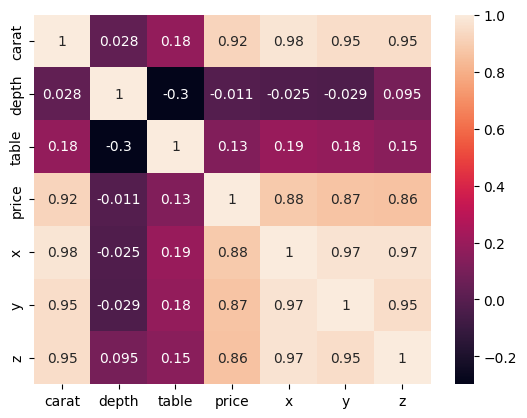

In [95]:

sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), annot= True)

In [96]:

X = data.drop(columns =['price', 'depth', 'table'], axis=1)#take out the variable we want to find correlations to and stick it in a variable
X

,carat,cut,color,clarity,x,y,z
0,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,0.21,Premium,E,SI1,3.89,3.84,2.31
2,0.23,Good,E,VS1,4.05,4.07,2.31
3,0.29,Premium,I,VS2,4.20,4.23,2.63
4,0.31,Good,J,SI2,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,5.75,5.76,3.50
53936,0.72,Good,D,SI1,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,6.15,6.12,3.74


In [97]:
y = data['price']#we want to find the things that predict price
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [98]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42) #turning our x and y columns into
# random_state keeps the distribution of data random but allows reproducability

X_train.shape, X_test.shape, y_train.shape, y_test.shape#lets make sure it was distributed right

((43035, 7), (10759, 7), (43035,), (10759,))

In [99]:
X_train

,carat,cut,color,clarity,x,y,z
33544,0.35,Ideal,D,VS2,4.47,4.53,2.79
26752,2.21,Ideal,D,SI2,8.36,8.31,5.18
45914,0.53,Ideal,E,VS2,5.24,5.30,3.16
3071,0.80,Premium,D,SI1,5.96,5.93,3.67
43829,0.41,Ideal,E,VVS1,4.81,4.82,2.96
...,...,...,...,...,...,...,...
11311,1.00,Premium,H,VS2,6.51,6.46,3.92
44869,0.63,Ideal,G,SI1,5.52,5.56,3.42
38271,0.32,Ideal,J,SI1,4.39,4.42,2.72
860,0.90,Premium,J,SI1,6.13,6.03,3.82


In [100]:
X.select_dtypes(exclude=['int64', 'float64']).columns #select anyhthing that isn't a integer or float in X

Index(['cut', 'color', 'clarity'], dtype='object')

In [101]:
# preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns #prints a subset composed of the integers and floats in the dataframe
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns#prints a subset composed of everything but integers and floats in the dataframe

In [102]:
from sklearn.compose import make_column_transformer #allows you to apply different transformations to different columns
#different types of dtypes
preprocessor = make_column_transformer((RobustScaler(), numerical_features), (OneHotEncoder(sparse_output=False), categorical_features)) #so both numberical features and categorical
preprocessor

ColumnTransformer(transformers=[('robustscaler', RobustScaler(),
                                 Index(['carat', 'x', 'y', 'z'], dtype='object')),
                                ('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 Index(['cut', 'color', 'clarity'], dtype='object'))])

In [103]:
X_train #train

,carat,cut,color,clarity,x,y,z
33544,0.35,Ideal,D,VS2,4.47,4.53,2.79
26752,2.21,Ideal,D,SI2,8.36,8.31,5.18
45914,0.53,Ideal,E,VS2,5.24,5.30,3.16
3071,0.80,Premium,D,SI1,5.96,5.93,3.67
43829,0.41,Ideal,E,VVS1,4.81,4.82,2.96
...,...,...,...,...,...,...,...
11311,1.00,Premium,H,VS2,6.51,6.46,3.92
44869,0.63,Ideal,G,SI1,5.52,5.56,3.42
38271,0.32,Ideal,J,SI1,4.39,4.42,2.72
860,0.90,Premium,J,SI1,6.13,6.03,3.82


Forgot to check distribution of model, will make it worse

In [104]:
X_train_preprocessed = preprocessor.fit_transform(X_train) #will data around 0, a normal distribution
X_train_preprocessed.shape #x-mX/stdX

(43035, 24)

In [105]:
# plt.hist(X_train['table']);


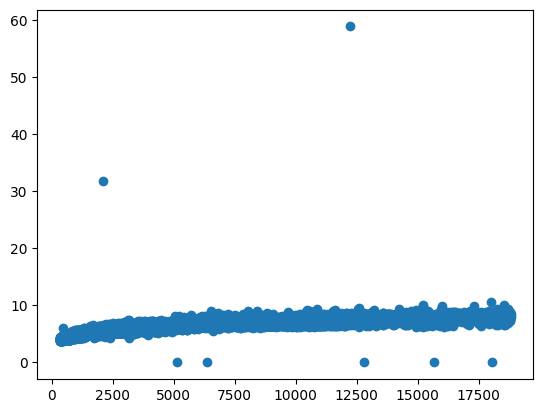

In [106]:
plt.scatter(y_train, X_train['y'])

In [107]:
X_train['cut'].nunique()

5

In [108]:
X_train['color'].nunique()

7

In [109]:
X_train['clarity'].nunique()

8

In [110]:
# pd.DataFrame(X_train_preprocessed, columns = preprocessor.get_feature_names_out())

In [111]:
X_test_preprocessed = preprocessor.transform(X_test)
X_test_preprocessed

array([[ 0.015625  , -0.03278689, -0.0989011 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.3125    ,  0.24590164,  0.25824176, ...,  0.        ,
         0.        ,  0.        ],
       [-0.203125  , -0.21311475, -0.20879121, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.59375   , -0.69945355, -0.7032967 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.3125    ,  0.8852459 ,  0.92307692, ...,  1.        ,
         0.        ,  0.        ],
       [-0.546875  , -0.66120219, -0.6978022 , ...,  0.        ,
         1.        ,  0.        ]])

In [112]:
X_train_preprocessed.shape

(43035, 24)

In [113]:
X_train_preprocessed.shape[1]

24

In [114]:
model = Sequential([
                    Dense(50, 'relu', input_shape=(X_train_preprocessed.shape[1],)),
                    Dense(75, 'relu'),
                    Dense(50, 'relu'),
                    Dense(1, 'linear')#Linear function for regression tasks

                    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [116]:
results_thing = model.fit(X_train_preprocessed, y_train, validation_split=0.2, epochs=25, batch_size=32, verbose=1)

Epoch 1/25
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 13772194.0000 - mae: 2122.4717 - val_loss: 975311.7500 - val_mae: 535.5629
Epoch 2/25
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 786682.7500 - mae: 486.9151 - val_loss: 729674.1875 - val_mae: 432.5294
Epoch 3/25
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 623988.6250 - mae: 408.7745 - val_loss: 650437.3125 - val_mae: 393.1695
Epoch 4/25
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 518936.0000 - mae: 371.5693 - val_loss: 772154.5000 - val_mae: 439.4504
Epoch 5/25
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 546922.4375 - mae: 378.6886 - val_loss: 786084.2500 - val_mae: 440.2563
Epoch 6/25
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 715001.1250 - mae: 376.2087 - val_loss: 586895.5000 - val_mae: 368.2495
Epoch 7/25
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 604196.7500 - mae: 362.1779 - val_loss: 565896.7500 - val_mae: 365.4585
Epoch 8/25
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - los

In [117]:
# 329.3893

In [118]:
results_thing.history

{'loss': [5670717.5,
  875122.6875,
  708369.5,
  642241.0,
  593050.9375,
  555805.3125,
  535070.6875,
  511839.9375,
  491004.5,
  473349.40625,
  457988.65625,
  441363.21875,
  430170.3125,
  423556.9375,
  418668.15625,
  411135.6875,
  409272.40625,
  404088.0625,
  402438.34375,
  400908.09375,
  395724.1875,
  397418.65625,
  392881.5625,
  390977.90625,
  389484.78125],
 'mae': [1201.28759765625,
  466.3691101074219,
  397.1969299316406,
  374.9089660644531,
  368.4382629394531,
  364.9568786621094,
  358.9484558105469,
  353.1795959472656,
  351.1917724609375,
  346.1128845214844,
  343.6864929199219,
  340.63885498046875,
  337.5312805175781,
  335.49578857421875,
  333.4305114746094,
  330.5921630859375,
  329.7790832519531,
  327.7665100097656,
  328.2464599609375,
  325.5728759765625,
  324.0202331542969,
  324.1281433105469,
  322.89288330078125,
  322.4519958496094,
  321.2012634277344],
 'val_loss': [975311.75,
  729674.1875,
  650437.3125,
  772154.5,
  786084.25,
  

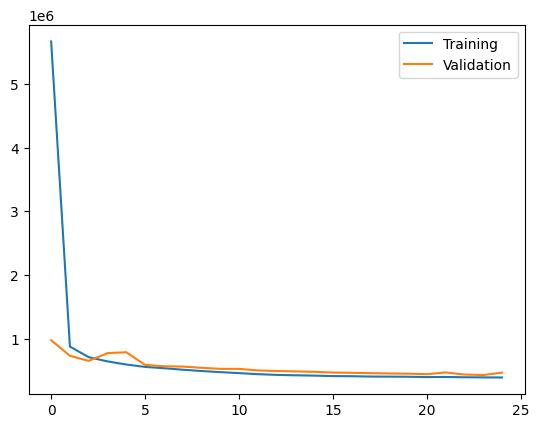

In [126]:
plt.plot(results_thing.history['loss'], label='Training')
plt.plot(results_thing.history['val_loss'], label ='Validation')
plt.legend()

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [121]:
linear_model=LinearRegression()

In [122]:
linear_model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [123]:
y_pred=linear_model.predict(X_test_preprocessed)

In [124]:
mae=mean_absolute_error(y_test, y_pred)

In [125]:
mae

728.8722199850835

In [125]:
# 728.8722199850835